In [1]:
#This is a financial analysis based on stocks bought by super investors in the second quarter

In [35]:
import yfinance as yf
import datetime
import pandas as pd

In [6]:
start_date = datetime.datetime(2023,4,1)
end_date = datetime.datetime(2023, 6, 30)

In [7]:
stock_tickers = ['EWBC',
                'BUD',
                'GOOGL',
                'COF',
                'OXY',
                'DHI',
                'NVR',
                 'BRK-B',
                 'LEN-B'
                ]

In [8]:
stock_price_hist = {}

In [9]:
for stock in stock_tickers:
    ticker = yf.Ticker(stock)
    stock_data = ticker.history(start=start_date, end = end_date)
    stock_data['avg'] = (stock_data['High'] + stock_data['Low'])/2
    avg_stock_price = stock_data['avg'].mean()
    print("The average price of {} is {}".format(stock, avg_stock_price))
    stock_price_hist[stock] = avg_stock_price

print(stock_price_hist)
    

The average price of EWBC is 50.19729434484731
The average price of BUD is 60.279021906838246
The average price of GOOGL is 114.93860651235111
The average price of COF is 98.92962569226991
The average price of OXY is 59.7777944372578
The average price of DHI is 108.75956079567621
The average price of NVR is 5807.2907474705435
The average price of BRK-B is 325.94057452092403
The average price of LEN-B is 97.94254591140734
{'EWBC': 50.19729434484731, 'BUD': 60.279021906838246, 'GOOGL': 114.93860651235111, 'COF': 98.92962569226991, 'OXY': 59.7777944372578, 'DHI': 108.75956079567621, 'NVR': 5807.2907474705435, 'BRK-B': 325.94057452092403, 'LEN-B': 97.94254591140734}


In [10]:
stock_price_curr = {}

In [12]:
for stock in stock_tickers:
    ticker = yf.Ticker(stock)
    stock_current = ticker.history(period='1d')
    stock_current['avg'] = (stock_current['High'] + stock_current['Low'])/2
    avg_stock_price = stock_current['avg'].mean()
    print("The current average price of {} is {}".format(stock, avg_stock_price))
    stock_price_curr[stock] = avg_stock_price

The current average price of EWBC is 54.209999084472656
The current average price of BUD is 57.60499954223633
The current average price of GOOGL is 137.51499938964844
The current average price of COF is 102.30500030517578
The current average price of OXY is 66.29499816894531
The current average price of DHI is 113.3499984741211
The current average price of NVR is 6138.18505859375
The current average price of BRK-B is 370.8999938964844
The current average price of LEN-B is 104.45000076293945


In [52]:
for key in stock_price_hist:
    if key in stock_price_curr:
        if stock_price_curr[key] < stock_price_hist[key]:
            percentage_down = ((stock_price_curr[key] - stock_price_hist[key])/stock_price_hist[key])*100
            print("The stock {} is currently down {}".format(key, percentage_down))
        else:
            percentage_up = ((stock_price_curr[key] - stock_price_hist[key])/stock_price_hist[key])*100
            print("The stock {} is currently up {}".format(key, percentage_up))

The stock EWBC is currently up 8.73095977793199
The stock BUD is currently down -5.323610442161724
The stock GOOGL is currently up 19.629082144148384
The stock COF is currently up 4.033550378311465
The stock OXY is currently up 11.39587999098915
The stock DHI is currently up 2.859921567771001
The stock NVR is currently up 4.986908433796745
The stock BRK-B is currently up 13.16786845347856
The stock LEN-B is currently up 4.117161665050966


In [13]:
import pandas_datareader.data as web
#Getting the consumer price index data 

start_date = datetime.datetime(2000,1,1)
current_datetime = datetime.datetime.now()
end_date = current_datetime.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
print(start_date)
print(end_date)


2000-01-01 00:00:00
2023-09-01 00:00:00


In [14]:
cpi_data = web.DataReader('CPIAUCSL','fred',start_date, end_date)

In [33]:
cpi_data.rename_axis('Date',inplace=True)
cpi_data.head()

            CPIAUCSL
DATE                
2000-01-01     169.3
2000-02-01     170.0
2000-03-01     171.0
2000-04-01     170.9
2000-05-01     171.2


,CPIAUCSL
Date,
2000-01-01,169.3
2000-02-01,170.0
2000-03-01,171.0
2000-04-01,170.9
2000-05-01,171.2


In [24]:
#getting S&P 500 index data 

symbol = "^GSPC"
sp500_data = yf.download(symbol,start= start_date, end= end_date)
sp500_data.drop(columns=['Open','High','Low','Close','Volume'],inplace= True)
sp500_data.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971


In [29]:
sp500_monthly = sp500_data.resample('M').mean()
sp500_monthly.index = sp500_monthly.index.to_period('M').to_timestamp()
sp500_monthly.head()

,Adj Close
Date,
2000-01-01,1425.585504
2000-02-01,1388.874500
2000-03-01,1442.212599
2000-04-01,1461.355257
2000-05-01,1418.479548


In [37]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
merged_df = pd.merge(cpi_data, sp500_monthly, on = 'Date')

/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kanthkr/opt/anaconda3/envs/finance/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

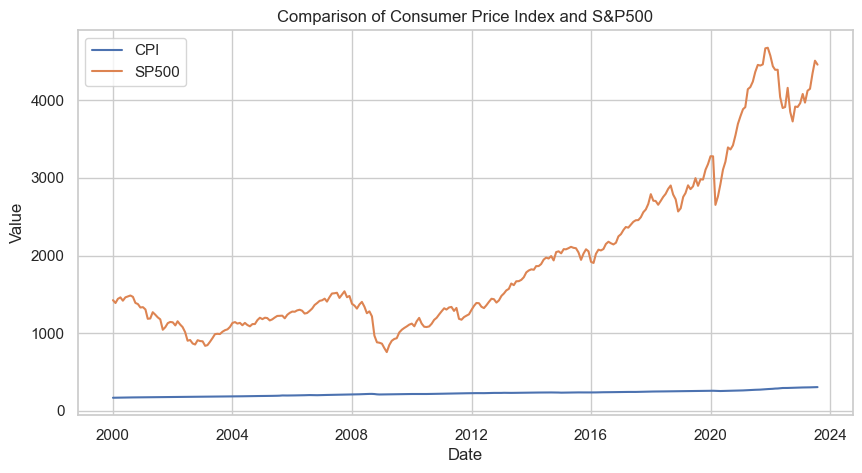

In [38]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,5))
sns.lineplot(data=merged_df, x='Date', y = 'CPIAUCSL',label='CPI')
sns.lineplot(data=merged_df, x='Date', y = 'Adj Close',label='SP500')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Consumer Price Index and S&P500')
plt.legend()
plt.show()